In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

import tqdm

import numpy as np

import os
import pandas as pd
import tqdm
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import multiprocessing as mp
import nltk
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns

from utils.text_preprocessing import *

from IPython.display import Audio
sound_file = '../alarm_sound/What is love.mp3'

In [46]:
! free -h

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
              total        used        free      shared  buff/cache   available
Mem:          9.1Gi       7.8Gi       1.1Gi        58Mi       178Mi       856Mi
Swap:         6.0Gi       6.0Gi        14Mi


In [5]:
%%time
df = pd.read_csv('./dataset-train-data/dataset_v6_downsampled.csv')

CPU times: user 4.82 s, sys: 593 ms, total: 5.41 s
Wall time: 5.4 s


# create train and val

In [6]:
train, test = train_test_split(
    df,test_size=0.1, stratify=df["topic"])

In [80]:
! mkdir train_test

In [7]:
train.to_csv('./train_test/train_v1.csv', index=False)

In [95]:
pip install transformers

/data/home/admin/environments/my_env/lib/python3.8/site-packages/cryptography/hazmat/backends/openssl/x509.py:14: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  warnings.warn(
     |████████████████████████████████| 3.5 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 39.4 MB/s eta 0:00:01
     |████████████████████████████████| 701 kB 22.3 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 2.4 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
test.to_csv('./train_test/val_v1.csv', index=False)

In [65]:
train = pd.read_csv('./train_test/train_v2.csv')
val = pd.read_csv('./train_test/val_v2.csv')
test = pd.read_csv('./train_test/test_v2.csv')

In [145]:
X_train = train['text']
y_train = train['topic']
X_test = test['text']
y_test = test['topic']
X_val = val['text']
y_val= val['topic']

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((1806798,), (225850,), (1806798,), (225850,), (225850,), (225850,))

In [46]:
%%time
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features=10000)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

CPU times: user 1min 28s, sys: 2.35 s, total: 1min 30s
Wall time: 1min 30s


In [47]:
%%time
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  

CPU times: user 11.6 s, sys: 405 ms, total: 12 s
Wall time: 12 s


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [77]:
y_predict = nb_tfidf.predict(X_train_vectors_tfidf)
print(classification_report(y_train,y_predict)) 

                        precision    recall  f1-score   support

          Animals&Pets       0.86      0.82      0.84     80000
           Art&Hobbies       0.77      0.82      0.80     80000
ArtificialIntelligence       0.85      0.59      0.70     13670
                Beauty       0.86      0.90      0.88     80000
      Books&Literature       0.87      0.89      0.88     80000
    Celebrities&Events       0.80      0.21      0.34     16498
               Clothes       0.86      0.90      0.88     80000
            Depression       0.77      0.96      0.85     66429
             Disasters       0.71      0.40      0.51     32922
             Education       0.87      0.59      0.70     13338
  Family&Relationships       0.83      0.20      0.32     13550
               Finance       0.63      0.28      0.38     13444
                  Food       0.86      0.92      0.89     80000
               Gadgets       0.79      0.90      0.84     80000
                Garden       0.74      

In [49]:
y_predict = nb_tfidf.predict(X_test_vectors_tfidf)
print(classification_report(y_test,y_predict))

                        precision    recall  f1-score   support

          Animals&Pets       0.86      0.82      0.84     10000
           Art&Hobbies       0.76      0.82      0.79     10000
ArtificialIntelligence       0.84      0.60      0.70      1709
                Beauty       0.86      0.89      0.88     10000
      Books&Literature       0.87      0.89      0.88     10000
    Celebrities&Events       0.79      0.20      0.32      2062
               Clothes       0.86      0.90      0.88     10000
            Depression       0.76      0.96      0.85      8303
             Disasters       0.69      0.39      0.50      4115
             Education       0.84      0.55      0.66      1667
  Family&Relationships       0.80      0.17      0.27      1694
               Finance       0.60      0.27      0.37      1680
                  Food       0.86      0.92      0.89     10000
               Gadgets       0.79      0.89      0.84     10000
                Garden       0.73      

In [50]:
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val)
y_predict = nb_tfidf.predict(X_val_vectors_tfidf)
print(classification_report(y_val,y_predict))

                        precision    recall  f1-score   support

          Animals&Pets       0.86      0.81      0.84     10000
           Art&Hobbies       0.76      0.83      0.79     10000
ArtificialIntelligence       0.85      0.56      0.68      1709
                Beauty       0.86      0.89      0.88     10000
      Books&Literature       0.87      0.89      0.88     10000
    Celebrities&Events       0.76      0.19      0.31      2063
               Clothes       0.86      0.90      0.88     10000
            Depression       0.77      0.96      0.85      8304
             Disasters       0.69      0.37      0.48      4115
             Education       0.87      0.58      0.70      1667
  Family&Relationships       0.80      0.18      0.29      1693
               Finance       0.60      0.25      0.36      1681
                  Food       0.86      0.91      0.88     10000
               Gadgets       0.79      0.88      0.83     10000
                Garden       0.73      

In [30]:
from catboost import CatBoostClassifier

ctb  = CatBoostClassifier()

In [31]:
a, X_train,b, y_train = train_test_split(X_train, y_train,
                                          stratify = y_train,
                                          test_size = 0.2,
                                          random_state = 123)

In [37]:
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 

In [ ]:
ctb.fit(X_train_vectors_tfidf, y_train , logging_level='Info', me)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.106851

3813, bin=5 score 96.86046168
1129, bin=22 score 125.9903961
5773, bin=17 score 146.887431
6476, bin=18 score 166.0311443
3646, bin=24 score 175.9427586
390, bin=2 score 188.4987518
0:	learn: 3.2062494	total: 1m 13s	remaining: 20h 23m 57s

7589, bin=1 score 75.84449897
5801, bin=3 score 92.92695845
1129, bin=1 score 106.0959685
2779, bin=27 score 118.0189194
3646, bin=7 score 128.9073865
5820, bin=9 score 138.3754689
1:	learn: 3.0853509	total: 2m 28s	remaining: 20h 37m 59s

3932, bin=10 score 69.05209418
2831, bin=1 score 84.82362565
3571, bin=9 score 97.23609547
3813, bin=25 score 109.8136311
4104, bin=18 score 119.2360474
8489, bin=15 score 128.2231521
2:	learn: 2.9888535	total: 3m 45s	remaining: 20h 48m 5s

3813, bin=5 score 60.33800482
7093, bin=18 score 74.52814541
6535, bin=25 score 87.33677649
5819, bin=25 score 97.10328251
5773, bin=2 score 106.6718232
1486, bin=83 score 115.7356568
3:	learn: 2.9331709	total: 5m 1s	remaining: 20h 51m 8s

9717, bin

3818, bin=6 score 23.81127089
837, bin=15 score 32.63451904
1497, bin=2 score 39.30065937
6942, bin=43 score 45.36353291
6298, bin=40 score 50.89670087
7880, bin=6 score 55.0205088
34:	learn: 2.3553339	total: 42m 49s	remaining: 19h 40m 55s

7247, bin=8 score 23.71203573
8233, bin=4 score 32.66339409
5806, bin=27 score 40.13177214
2632, bin=2 score 45.04361791
9137, bin=4 score 51.56183362
2767, bin=24 score 55.44313019
35:	learn: 2.3480886	total: 43m 56s	remaining: 19h 36m 51s

7918, bin=12 score 22.94114134
9885, bin=20 score 33.2716293
5453, bin=4 score 40.32843312
1871, bin=6 score 45.1519052
8358, bin=9 score 51.0722341
4104, bin=83 score 55.18580812
36:	learn: 2.3369377	total: 45m 2s	remaining: 19h 32m 17s

5801, bin=0 score 22.5900689
5844, bin=25 score 31.33546659
3439, bin=19 score 39.23391262
4260, bin=1 score 44.76066925
1497, bin=38 score 49.80983568
8938, bin=107 score 54.01562405
37:	learn: 2.3269221	total: 46m 8s	remaining: 19h 28m 14s

4083, bin=3 score 22.65202516
7698,

8125, bin=25 score 18.29430028
1585, bin=11 score 25.53489204
3545, bin=5 score 30.73313074
2928, bin=27 score 34.68334782
4083, bin=2 score 38.32963255
9436, bin=23 score 41.74667533
68:	learn: 2.1169787	total: 1h 19m 52s	remaining: 17h 57m 42s

7470, bin=3 score 18.0412253
8125, bin=48 score 25.86738586
6086, bin=11 score 30.15996666
6458, bin=15 score 34.63006737
9949, bin=96 score 38.32915058
6145, bin=9 score 43.27087719
69:	learn: 2.1126755	total: 1h 20m 58s	remaining: 17h 55m 52s

1003, bin=2 score 18.91767705
3340, bin=5 score 25.09865664
4963, bin=69 score 30.65078747
8229, bin=44 score 34.75024223
4817, bin=15 score 38.24353636
4829, bin=8 score 42.3691372
70:	learn: 2.1081787	total: 1h 22m 6s	remaining: 17h 54m 15s

9121, bin=26 score 19.34083883
3571, bin=5 score 26.12121614
2959, bin=19 score 31.9548061
8792, bin=35 score 35.68654999
5228, bin=9 score 39.9629438
2495, bin=31 score 43.09732202
71:	learn: 2.1029798	total: 1h 23m 12s	remaining: 17h 52m 21s

8191, bin=10 score

5819, bin=35 score 29.28824604
1003, bin=79 score 33.40313198
7470, bin=47 score 35.59977108
101:	learn: 1.9652564	total: 1h 58m 33s	remaining: 17h 23m 43s

1686, bin=44 score 14.89900941
1029, bin=9 score 20.89595037
1136, bin=0 score 24.85147978
8971, bin=69 score 28.82253414
6391, bin=1 score 32.19287485
8797, bin=6 score 34.40222698
102:	learn: 1.9628689	total: 1h 59m 51s	remaining: 17h 23m 47s

9690, bin=3 score 14.85275189
1684, bin=26 score 20.82090753
4963, bin=34 score 26.44115644
7496, bin=48 score 29.23025845
9121, bin=40 score 31.9103171
6298, bin=5 score 35.30384806
103:	learn: 1.9602373	total: 2h 1m 15s	remaining: 17h 24m 44s

7999, bin=3 score 15.02004159
4951, bin=2 score 20.27922845
8212, bin=3 score 25.33220793
6997, bin=7 score 29.14995398
7247, bin=64 score 31.94421209
1133, bin=69 score 34.71342423
104:	learn: 1.9572770	total: 2h 2m 35s	remaining: 17h 24m 57s

6973, bin=48 score 14.85391633
5774, bin=84 score 20.93883196
4930, bin=16 score 24.99571767
5453, bin=7 s

134:	learn: 1.8589884	total: 2h 45m 12s	remaining: 17h 38m 34s

7910, bin=77 score 12.70909499
3991, bin=6 score 17.82717806
3371, bin=30 score 21.78324738
8796, bin=3 score 24.68062199
7470, bin=37 score 27.63495044
3592, bin=4 score 30.15653833
135:	learn: 1.8566203	total: 2h 46m 43s	remaining: 17h 39m 14s

4829, bin=0 score 12.74515064
1683, bin=5 score 18.36630965
1003, bin=2 score 22.55571073
3932, bin=39 score 26.63863321
1698, bin=10 score 29.64670009
1198, bin=5 score 32.32673395
136:	learn: 1.8549519	total: 2h 48m 14s	remaining: 17h 39m 49s

3740, bin=0 score 12.95350964
6942, bin=11 score 17.65575084
2779, bin=0 score 22.03714824
2780, bin=53 score 26.28681157
4260, bin=0 score 29.01953871
2960, bin=8 score 31.75982767
137:	learn: 1.8519466	total: 2h 49m 44s	remaining: 17h 40m 17s

1486, bin=148 score 12.69245243
6476, bin=88 score 18.64297453
7600, bin=8 score 22.51120226
4747, bin=16 score 25.86574787
1455, bin=38 score 28.84243647
2860, bin=45 score 31.38930855
138:	learn:

3571, bin=0 score 20.03632754
8807, bin=69 score 23.28680305
8618, bin=15 score 26.0170541
9671, bin=63 score 28.57576241
168:	learn: 1.7725119	total: 3h 30m 8s	remaining: 17h 13m 17s

5342, bin=128 score 11.45629083
8777, bin=2 score 16.01575592
6555, bin=0 score 19.65377366
6633, bin=19 score 22.58829611
7496, bin=14 score 25.24365835
1744, bin=0 score 28.0801123
169:	learn: 1.7702919	total: 3h 31m 26s	remaining: 17h 12m 17s

7478, bin=0 score 11.39514529
3575, bin=63 score 15.87933148
7620, bin=6 score 19.34440075
2223, bin=5 score 22.25758137
928, bin=0 score 24.84528312
8908, bin=101 score 27.17165527
170:	learn: 1.7675756	total: 3h 32m 44s	remaining: 17h 11m 19s

7910, bin=20 score 11.48491482
1585, bin=77 score 16.0150572
3991, bin=1 score 19.49401286
6630, bin=17 score 22.39699978
1664, bin=60 score 24.95183184
9571, bin=103 score 27.30054697
171:	learn: 1.7658965	total: 3h 34m 2s	remaining: 17h 10m 21s

9138, bin=0 score 11.36944272
9089, bin=2 score 15.99149434
1096, bin=6 sc

9048, bin=16 score 10.38212055
4965, bin=0 score 14.53373138
7661, bin=3 score 17.73810333
6270, bin=0 score 20.37520352
8162, bin=0 score 22.69334862
1087, bin=0 score 24.78671722
202:	learn: 1.7016965	total: 4h 13m 55s	remaining: 16h 36m 55s

7283, bin=0 score 10.11252672
5727, bin=1 score 14.27271904
391, bin=56 score 17.45460225
928, bin=61 score 20.13973706
2351, bin=67 score 22.59120824
2632, bin=0 score 24.89855415
203:	learn: 1.7000814	total: 4h 15m 13s	remaining: 16h 35m 51s

2098, bin=39 score 10.36324687
8112, bin=1 score 14.49734523
3070, bin=7 score 17.65997548
4747, bin=0 score 20.30682086
3439, bin=0 score 22.62584068
8217, bin=80 score 24.70734975
204:	learn: 1.6988656	total: 4h 16m 31s	remaining: 16h 34m 48s

7592, bin=100 score 9.98907183
4840, bin=0 score 14.09609662
2121, bin=0 score 17.24921111
6477, bin=109 score 19.90027
2782, bin=29 score 22.23421502
6997, bin=0 score 24.33332375
205:	learn: 1.6976797	total: 4h 17m 49s	remaining: 16h 33m 44s

4833, bin=0 score 1

4202, bin=0 score 21.69639876
5592, bin=0 score 23.81796598
235:	learn: 1.6473785	total: 4h 56m 39s	remaining: 16h 20s

7113, bin=18 score 10.10281487
3106, bin=18 score 13.91607102
6512, bin=57 score 16.83583432
4790, bin=42 score 19.29405819
7422, bin=78 score 21.44921209
1860, bin=118 score 23.42270702
236:	learn: 1.6460868	total: 4h 57m 57s	remaining: 15h 59m 14s

6146, bin=0 score 9.532829535
9186, bin=16 score 13.40093856
2269, bin=0 score 16.37273811
7918, bin=80 score 18.80627182
7919, bin=74 score 21.05705226
2960, bin=100 score 22.97356657
237:	learn: 1.6450251	total: 4h 59m 15s	remaining: 15h 58m 7s

751, bin=26 score 9.769943441
9529, bin=5 score 13.5938651
6775, bin=27 score 16.50055449
3758, bin=3 score 18.91749308
7478, bin=0 score 21.0365196
3592, bin=0 score 22.94705299
238:	learn: 1.6434773	total: 5h 33s	remaining: 15h 57m

3374, bin=0 score 9.642598982
1366, bin=0 score 13.56368709
9157, bin=39 score 16.57855756
8163, bin=2 score 19.10883503
6392, bin=33 score 21.334

8971, bin=1 score 8.799661361
8843, bin=3 score 12.38517668
1699, bin=37 score 15.13741334
7226, bin=138 score 17.4494805
5229, bin=83 score 19.4796222
9089, bin=3 score 21.31311997
269:	learn: 1.5974542	total: 5h 40m 46s	remaining: 15h 21m 20s

464, bin=40 score 8.926939567
6938, bin=0 score 12.59663835
8217, bin=130 score 15.40837385
6543, bin=58 score 17.70787456
3448, bin=145 score 19.72516676
784, bin=31 score 21.5991091
270:	learn: 1.5956876	total: 5h 42m 4s	remaining: 15h 20m 11s

3306, bin=3 score 9.010933306
3071, bin=0 score 12.61504622
8387, bin=0 score 15.39305543
8233, bin=0 score 17.73077056
5047, bin=32 score 19.85344076
5844, bin=0 score 21.99542174
271:	learn: 1.5949129	total: 5h 43m 22s	remaining: 15h 19m 2s

6362, bin=0 score 8.857201383
9048, bin=39 score 12.43695117
9891, bin=70 score 15.28636982
3556, bin=94 score 17.63583075
2780, bin=0 score 19.73376836
1510, bin=32 score 21.65210493
272:	learn: 1.5940939	total: 5h 44m 40s	remaining: 15h 17m 52s

3040, bin=27 sc

4790, bin=84 score 18.68003122
9324, bin=25 score 20.41870524
302:	learn: 1.5553884	total: 6h 23m 35s	remaining: 14h 42m 24s

1096, bin=31 score 8.496801349
2860, bin=44 score 11.81328177
8568, bin=0 score 14.37855395
7919, bin=34 score 16.57207186
5490, bin=220 score 18.54682517
1141, bin=22 score 20.33038449
303:	learn: 1.5542281	total: 6h 24m 53s	remaining: 14h 41m 12s

1642, bin=0 score 8.195227715
3825, bin=0 score 11.60662065
4385, bin=0 score 14.28905639
1198, bin=16 score 16.46169042
9188, bin=0 score 18.36909676
8957, bin=102 score 20.13731343
304:	learn: 1.5528886	total: 6h 26m 11s	remaining: 14h 40m

7247, bin=38 score 8.393281574
8626, bin=42 score 11.8388267
8625, bin=0 score 14.7670591
5820, bin=0 score 16.93458751
1368, bin=37 score 18.90072522
4008, bin=0 score 20.65146087
305:	learn: 1.5519345	total: 6h 27m 28s	remaining: 14h 38m 47s

9121, bin=33 score 8.463799428
928, bin=27 score 11.87534138
5013, bin=69 score 14.4612705
7060, bin=32 score 16.65209444
1329, bin=41 s

5319, bin=8 score 8.212878936
7227, bin=137 score 11.50597263
7540, bin=39 score 14.03988951
8586, bin=0 score 16.1159469
1886, bin=1 score 17.8851568
8807, bin=19 score 19.57927111
336:	learn: 1.5191656	total: 7h 7m 36s	remaining: 14h 1m 16s

2121, bin=0 score 8.354936879
7137, bin=3 score 11.73061189
6211, bin=0 score 14.27223999
4953, bin=21 score 16.37013978
9719, bin=68 score 18.21379129
6270, bin=0 score 19.89827215
337:	learn: 1.5183321	total: 7h 8m 55s	remaining: 14h 4s

4385, bin=114 score 8.075393823
3259, bin=18 score 11.34538417
4963, bin=138 score 13.80341137
3040, bin=2 score 15.86411237
7814, bin=0 score 17.6786474
2235, bin=75 score 19.34371764
338:	learn: 1.5176893	total: 7h 10m 13s	remaining: 13h 58m 52s

3831, bin=49 score 8.021706527
590, bin=9 score 11.28485118
9618, bin=1 score 13.64459179
1546, bin=45 score 15.63747357
7668, bin=101 score 17.39742811
4650, bin=2 score 19.01575328
339:	learn: 1.5165997	total: 7h 11m 32s	remaining: 13h 57m 41s

9272, bin=98 score 8

In [ ]:
log_reg = LogisticRegression()

# check predicts

In [22]:
def ff(x):
    res = ''
    if x[2]==1:
        res = x[1][0][0]

    if x[2]==2:
        if x[0] in x[1][0]:
            res = x[0]
        else:
            res = x[1][0][0]
    return res

In [25]:
val['preds'] = val[['topic','predicts','lens']].apply(ff, axis=1)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
import warnings

In [28]:
warnings.filterwarnings('ignore')

In [29]:
print(classification_report(y_pred=val['preds'], y_true = val.topic))

                        precision    recall  f1-score   support

                             0.00      0.00      0.00         0
          Animals&Pets       0.96      0.89      0.92     10000
           Art&Hobbies       0.88      0.86      0.87     10000
ArtificialIntelligence       0.84      0.72      0.78      1302
                Beauty       0.94      0.94      0.94     10000
      Books&Literature       0.96      0.95      0.96     10000
    Celebrities&Events       0.75      0.55      0.64      2521
               Clothes       0.95      0.93      0.94     10000
            Depression       0.96      0.95      0.95      3190
             Disasters       0.76      0.63      0.69      4286
             Education       0.89      0.91      0.90      1731
  Family&Relationships       0.89      0.80      0.84      1739
               Finance       0.62      0.44      0.52      1545
                  Food       0.96      0.93      0.94     10000
               Gadgets       0.92      

In [45]:
print(classification_report(y_pred=val[val.lens==2]['preds'], y_true = val[val.lens==2].topic))

                        precision    recall  f1-score   support

          Animals&Pets       1.00      0.75      0.86         4
           Art&Hobbies       0.95      0.96      0.96        84
ArtificialIntelligence       1.00      0.86      0.92         7
                Beauty       0.90      0.97      0.93        29
      Books&Literature       0.82      0.94      0.87        33
    Celebrities&Events       0.92      0.67      0.77        18
               Clothes       1.00      0.92      0.96        39
            Depression       0.83      1.00      0.91         5
             Disasters       1.00      0.68      0.81        28
             Education       1.00      0.86      0.92         7
  Family&Relationships       1.00      1.00      1.00         6
               Finance       1.00      0.63      0.77        27
                  Food       1.00      0.80      0.89        15
               Gadgets       0.79      0.81      0.80        27
                Garden       1.00      

In [30]:
categories = ['no label']+sorted(val.topic.unique())

In [31]:
import seaborn as sns
from matplotlib import pyplot as plt

In [33]:
kek = confusion_matrix(y_pred=val['preds'], y_true = val.topic)

In [34]:
import numpy as np

In [35]:
group_counts = ['{0:0.0f}'.format(value) for value in
                kek.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     kek.flatten()/np.sum(kek)]
labels = [f'{v2}\n{v3}' for v2, v3 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(34,34)

In [36]:

group_percentages = ['{0:.1%}'.format(value) for value in 
                     (kek/np.sum(kek, axis=0)).flatten()]
labels = [f'{v2}' for v2 in
          group_percentages]

labels = np.asarray(labels).reshape(34,34)

In [43]:
(kek/np.sum(kek, axis=0))

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.96425458e-02, 9.57620738e-01, 5.41147641e-03, ...,
        1.03840125e-02, 3.39904827e-04, 8.73743993e-04],
       [4.22445906e-02, 2.58147790e-03, 8.76352869e-01, ...,
        2.71355799e-02, 0.00000000e+00, 5.46089996e-04],
       ...,
       [2.73440596e-02, 5.70076369e-03, 2.31774556e-02, ...,
        8.62656740e-01, 1.01971448e-03, 1.16863259e-02],
       [6.26139336e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.54860639e-01, 2.18435998e-04],
       [3.63794880e-02, 5.37807895e-04, 1.93996324e-03, ...,
        2.52742947e-02, 3.39904827e-04, 9.37418087e-01]])

<AxesSubplot:>

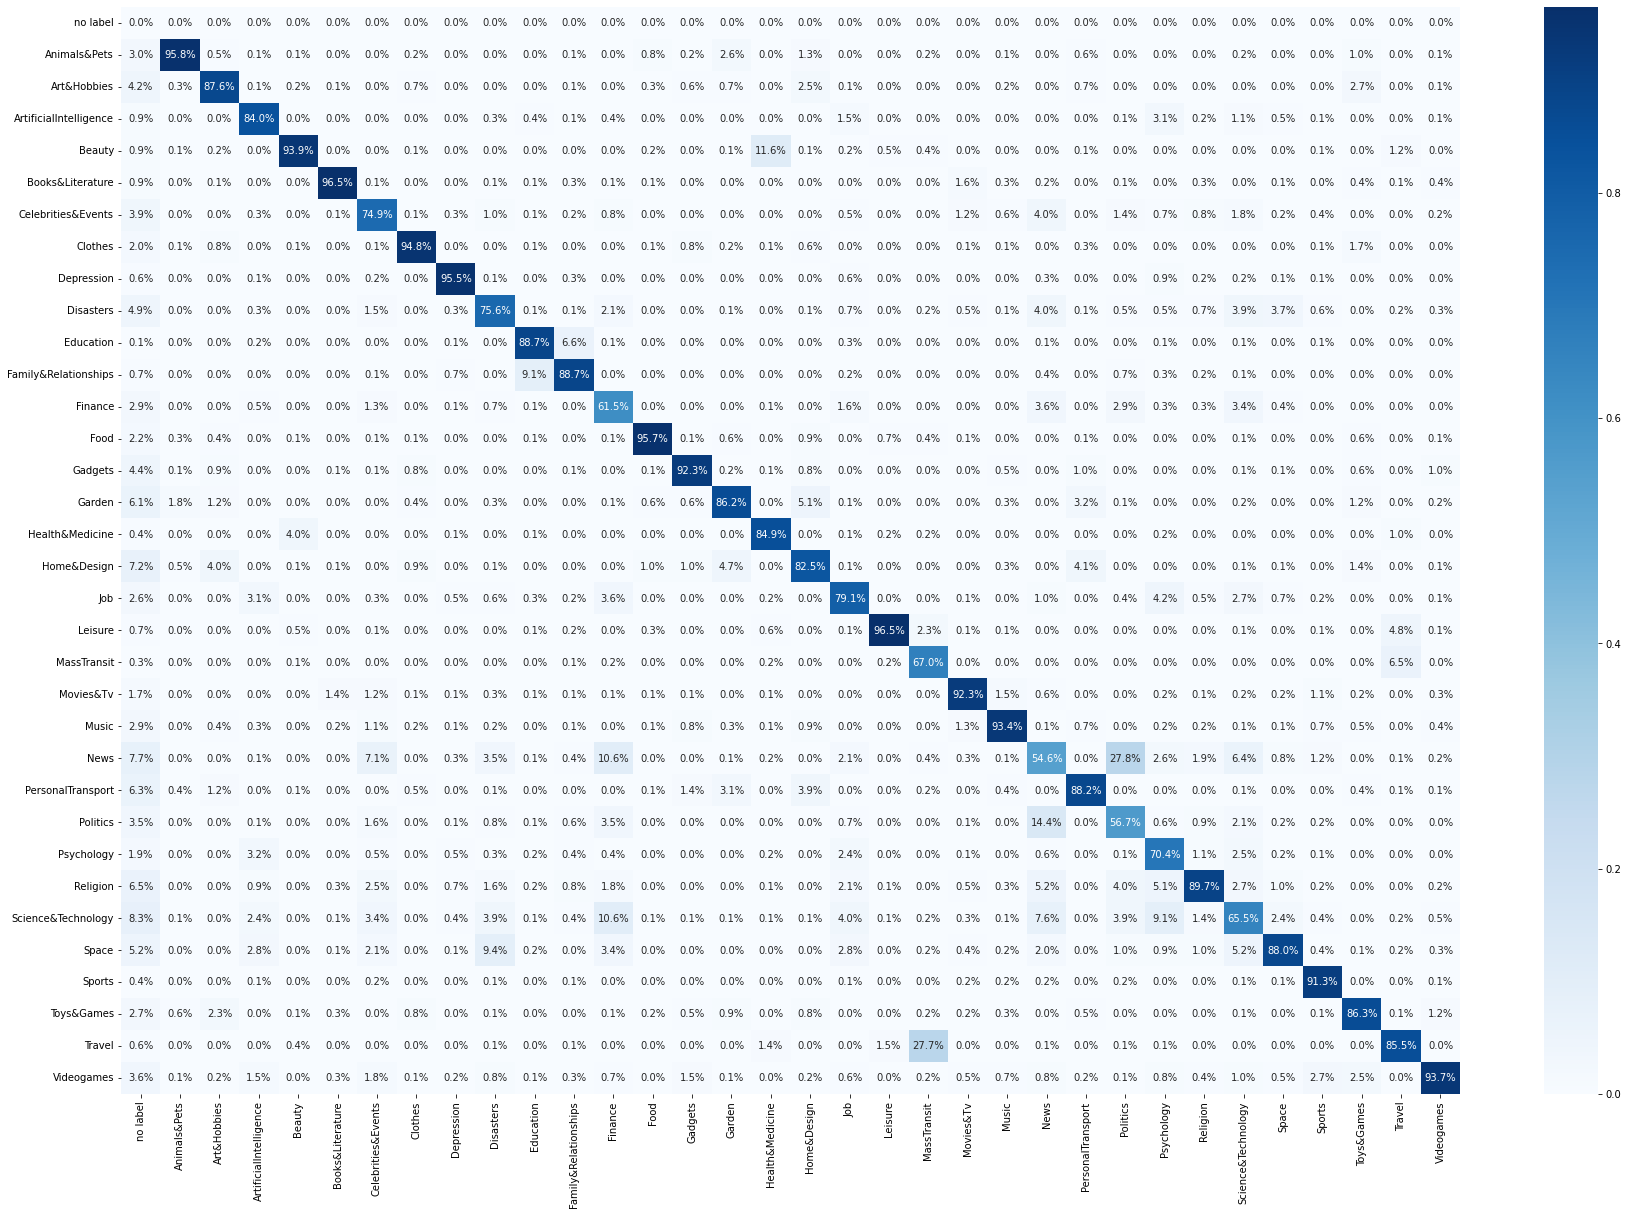

In [44]:
plt.figure(figsize=(30,20))

sns.heatmap((kek/np.sum(kek, axis=0)), fmt='',
            cmap='Blues',
            annot=labels,
            xticklabels=categories,
            yticklabels=categories)

In [ ]:
print(classification_report(y_pred=val[val.lens==2]['preds'], y_true = val.topic))

In [2]:
df = pd.read_csv('./train_test/val_with_preds.csv')

In [5]:
df[df.lens==2][['text','predicts']].to_json('more_then_1_preds.json')

In [39]:
import numpy as np

import torch
import torch.nn as nn

from captum.attr import (
    GradientShap,
    DeepLift,
    DeepLiftShap,
    IntegratedGradients,
    LayerConductance,
    NeuronConductance,
    NoiseTunnel,
)

In [40]:
torch.manual_seed(123)
np.random.seed(123)

In [2]:
from deeppavlov import build_model

model = build_model('config.json')

[nltk_data] Downloading package punkt to /home/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     /home/admin/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /home/admin/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!
2022-03-20 07:18:39.263 INFO in 'deeppavlov.core.data.simple_vocab'['simple_vocab'] at line 115: [loading vocabulary from /data/home/admin/.deeppavlov/models/classifiers/topic_classifier_v2/classes.dict]
2022-03-20 07:18:39.635 INFO in 'deeppavlov.models.torch_bert.torch_transformers_classifier'['torch_transformers_classifier'] at line 201: From pretrained bert-base-uncased.
Some weights of the model checkpoint at bert-base-uncased were not use

In [95]:
%%time
val = pd.read_csv('./train_test/val_v2.csv')
train = pd.read_csv('./train_test/train_v2.csv')
test = pd.read_csv('./train_test/test_v2.csv')

CPU times: user 6.48 s, sys: 729 ms, total: 7.21 s
Wall time: 7.21 s


In [17]:
%%time
test_texts = test.text.tolist()
test_preds = model.batched_call(test_texts, batch_size=800)

CPU times: user 15min 7s, sys: 1.81 s, total: 15min 8s
Wall time: 14min 4s


In [19]:
%%time
val_texts = val.text.tolist()
val_preds = model.batched_call(val_texts, batch_size=800)

CPU times: user 15min 6s, sys: 2.7 s, total: 15min 8s
Wall time: 14min 4s


In [20]:
%%time
train_texts = train.text.tolist()
train_preds = model.batched_call(train_texts, batch_size=800)

CPU times: user 2h 1min 50s, sys: 17.4 s, total: 2h 2min 8s
Wall time: 1h 53min 17s


In [66]:
val['preds'] = val_preds
train['preds'] = train_preds
test['preds'] = test_preds

In [67]:
val['lens'] = val.preds.apply(len)
test['lens'] = test.preds.apply(len)
train['lens'] = train.preds.apply(len)

In [54]:
train.lens.value_counts()

1    1709259
0      93632
2       3907
Name: lens, dtype: int64

In [69]:
# val = val[val.lens!=0]
# test = test[test.lens!=0]
# train = train[train.lens!=0]
val['preds'] = val.preds.apply(lambda x:x[0] if x!=[] else '')
test['preds'] = test.preds.apply(lambda x:x[0] if x!=[] else '')
train['preds'] = train.preds.apply(lambda x:x[0] if x!=[] else '')

In [70]:
val

,text,topic,preds,lens
0,"I have to admit, I am an Olive Oil snob. I coo...",Food,Food,1
1,Mantel goes out of her way to disparage Thomas...,Books&Literature,Books&Literature,1
2,It's tragic and bittersweet at the same time. ...,Music,Music,1
3,This case is a must have... It is slim doesn't...,Gadgets,Gadgets,1
4,I bought for my book group but we postponed re...,Books&Literature,Books&Literature,1
...,...,...,...,...
225845,I received a pair of these ARS 300L which is w...,Garden,Garden,1
225846,We joined because we didn't want to lose touch...,Science&Technology,,0
225847,"That's what I'm saying, you would think that G...",Science&Technology,Science&Technology,1
225848,So far the best sunflower seeds I've found for...,Food,Garden,1


In [22]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [76]:
for j,j1 in zip([train, val, test],['train', 'val', 'test']):
    print('*'*20)
    print()
    
    print(j1)
    print()
    for i in ['macro','weighted']:
        print(i+' f1_score: ',f1_score(y_pred=j.preds, y_true = j.topic, average=i))
    print('accuracy: ',accuracy_score(y_pred=j.preds, y_true = j.topic))

********************

train

macro f1_score:  0.8906940411715523
weighted f1_score:  0.9447776025641235
accuracy:  0.9229188874461893
********************

val

macro f1_score:  0.8095121679321431
weighted f1_score:  0.8807346132622627
accuracy:  0.8571441222050034
********************

test

macro f1_score:  0.810580550024193
weighted f1_score:  0.8822724903827848
accuracy:  0.858684967899048
